In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM

# from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/home/abhi/Desktop/mayank/"))

# Any results you write to the current directory are saved as output.

2023-10-29 10:23:31.490558: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 10:23:32.068399: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 10:23:32.068490: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 10:23:32.070842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-29 10:23:32.289145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 10:23:32.292379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

['wheather.ipynb', 'rainfall in india 1901-2015.csv', '.ipynb_checkpoints', 'district wise rainfall normal.csv']


In [2]:
dataset= pd.read_csv('/home/abhi/Desktop/mayank/rainfall in india 1901-2015.csv',encoding = "ISO-8859-1")

dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [3]:
groups = dataset.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
data = groups.get_group('BIHAR')
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6


In [4]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [5]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [6]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [7]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [8]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,10,8.3


In [9]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,10,8.3,1901-10-01


In [10]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [11]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [12]:
series.shape

(1380, 1)

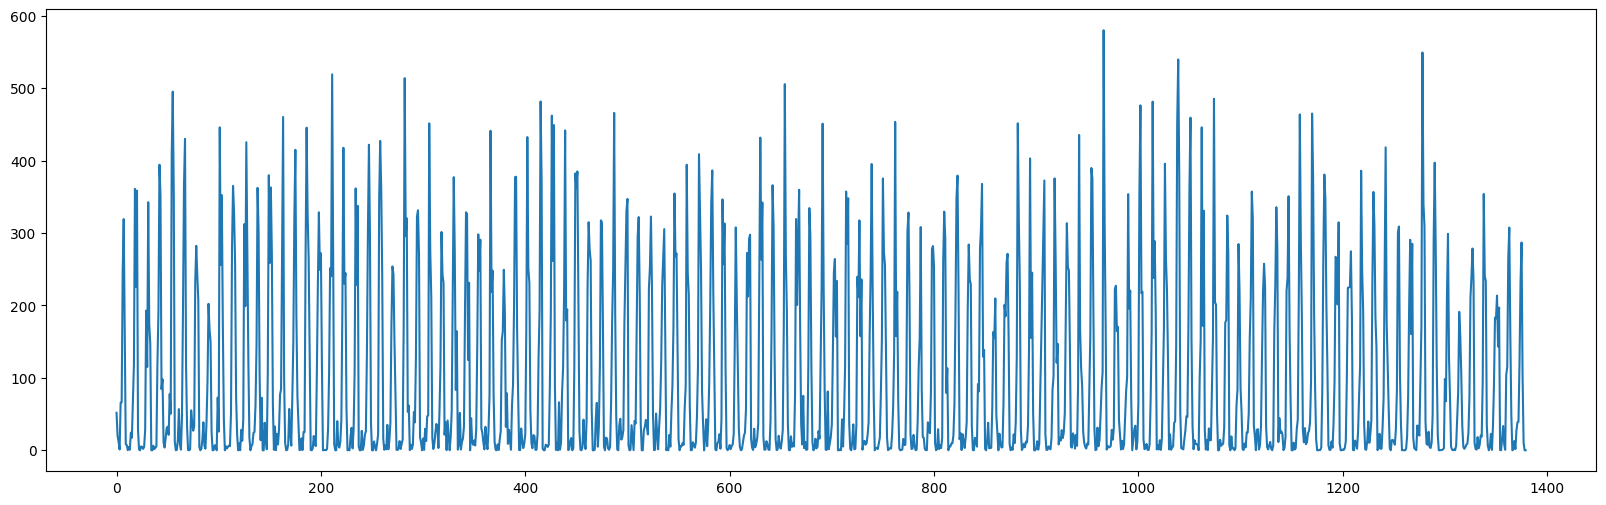

In [13]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [14]:
# Get the raw data values from the pandas data frame.
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [15]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1104, 276)


In [16]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [27]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1102, 1)
New training data shape:
(1102, 1, 1)


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))  # 50 is the number of LSTM units, adjust as needed
model.add(Dense(1))  # Output layer with one neuron for regression task
model.compile(loss='mean_squared_error', optimizer='adam')  # Mean squared error loss for regression, Adam optimizer

# Train the model
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)  # Adjust epochs and batch size as needed

# Evaluate the model on the test data
train_loss = model.evaluate(train_X, train_Y, verbose=0)
print(f"Training Loss: {train_loss:.4f}")

test_loss = model.evaluate(test_X, test_Y, verbose=0)
print(f"Testing Loss: {test_loss:.4f}")

# Make predictions using the trained model
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

# Perform any additional analysis or visualization with train_predictions and test_predictions as needed


Epoch 1/100
1102/1102 - 5s - loss: 0.0346 - 5s/epoch - 4ms/step
Epoch 2/100
1102/1102 - 2s - loss: 0.0303 - 2s/epoch - 2ms/step
Epoch 3/100
1102/1102 - 2s - loss: 0.0302 - 2s/epoch - 2ms/step
Epoch 4/100
1102/1102 - 2s - loss: 0.0302 - 2s/epoch - 2ms/step
Epoch 5/100
1102/1102 - 3s - loss: 0.0300 - 3s/epoch - 2ms/step
Epoch 6/100
1102/1102 - 2s - loss: 0.0296 - 2s/epoch - 2ms/step
Epoch 7/100
1102/1102 - 2s - loss: 0.0292 - 2s/epoch - 2ms/step
Epoch 8/100
1102/1102 - 2s - loss: 0.0292 - 2s/epoch - 2ms/step
Epoch 9/100
1102/1102 - 2s - loss: 0.0290 - 2s/epoch - 2ms/step
Epoch 10/100
1102/1102 - 2s - loss: 0.0287 - 2s/epoch - 2ms/step
Epoch 11/100
1102/1102 - 2s - loss: 0.0288 - 2s/epoch - 2ms/step
Epoch 12/100
1102/1102 - 2s - loss: 0.0284 - 2s/epoch - 2ms/step
Epoch 13/100
1102/1102 - 2s - loss: 0.0281 - 2s/epoch - 2ms/step
Epoch 14/100
1102/1102 - 2s - loss: 0.0278 - 2s/epoch - 2ms/step
Epoch 15/100
1102/1102 - 2s - loss: 0.0278 - 2s/epoch - 2ms/step
Epoch 16/100
1102/1102 - 2s - loss

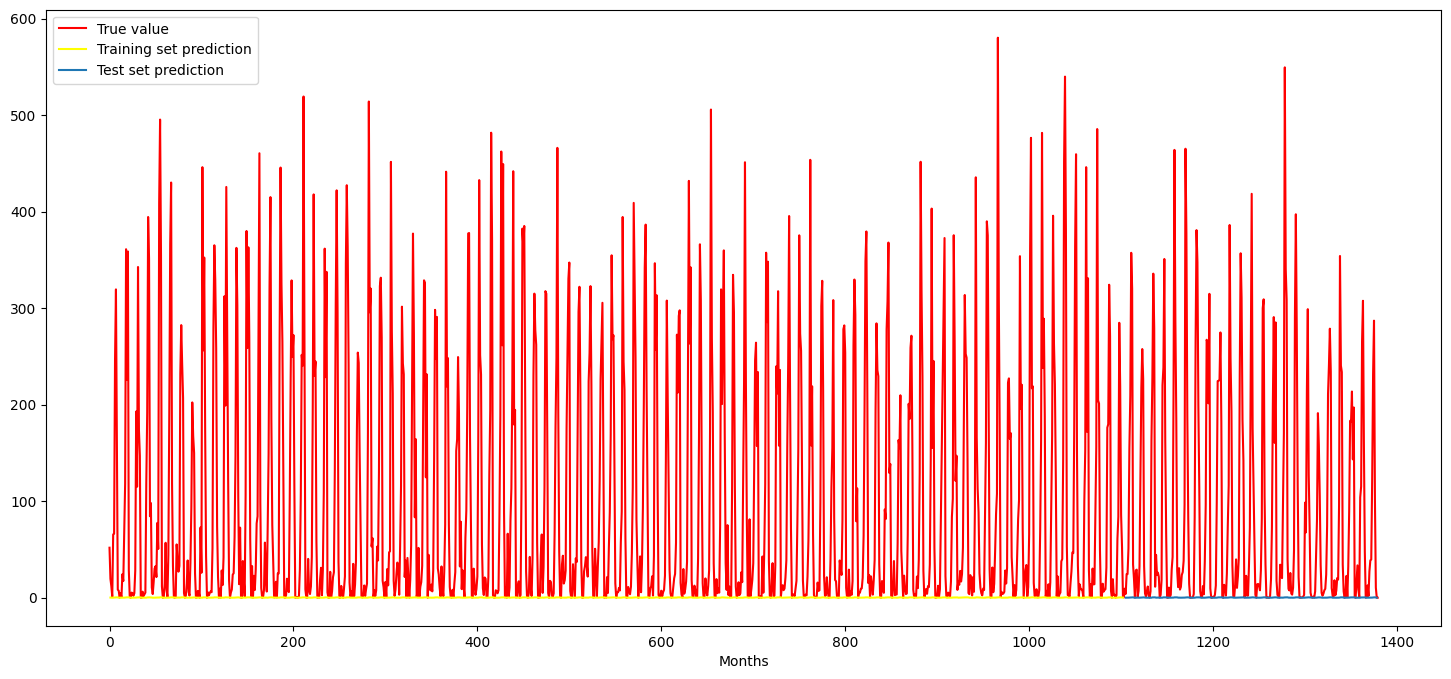

In [33]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predictions) + window_size, :] = train_predictions

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predictions) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predictions

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [34]:
test_predictions

array([[0.03311104],
       [0.01458822],
       [0.08161137],
       [0.08161137],
       [0.15548769],
       [0.3245998 ],
       [0.36153346],
       [0.39657116],
       [0.3915657 ],
       [0.11051881],
       [0.06545493],
       [0.0008231 ],
       [0.09305824],
       [0.0954296 ],
       [0.00402854],
       [0.02495557],
       [0.10593572],
       [0.29944557],
       [0.36546868],
       [0.37919474],
       [0.3690885 ],
       [0.10651151],
       [0.01598164],
       [0.00473846],
       [0.02427039],
       [0.04047886],
       [0.0075698 ],
       [0.0008231 ],
       [0.02392751],
       [0.3317113 ],
       [0.36947578],
       [0.3937902 ],
       [0.3843372 ],
       [0.03981331],
       [0.13823715],
       [0.07946967],
       [0.08616602],
       [0.07298264],
       [0.00118013],
       [0.01108968],
       [0.06196401],
       [0.36649486],
       [0.37343878],
       [0.39577305],
       [0.33137536],
       [0.19114764],
       [0.00046588],
       [0.000

In [35]:
train_predictions

array([[0.15723853],
       [0.06640257],
       [0.04147556],
       ...,
       [0.36611357],
       [0.23131482],
       [0.15873158]], dtype=float32)